In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.multioutput import MultiOutputRegressor
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB


%matplotlib inline
import tensorflow as tf

In [3]:
cnt = pd.read_csv("carbon_nanotubes.csv")
cnt.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"


In [4]:
cnt.columns

Index(['Chiral indice n', 'Chiral indice m', 'Initial atomic coordinate u',
       'Initial atomic coordinate v', 'Initial atomic coordinate w',
       'Calculated atomic coordinates u'', 'Calculated atomic coordinates v'',
       'Calculated atomic coordinates w''],
      dtype='object')

In [5]:
cnt.columns=['chiral_index_n', 'chiral_index_m', 'initial_coord_u', 'initial_coord_v', 'initial_coord_w', 'calc_coord_u', 'calc_coord_v', 'calc_coord_w']
cnt_nn = cnt[['chiral_index_n', 'chiral_index_m','initial_coord_u', 'initial_coord_v', 'initial_coord_w', 'calc_coord_u', 'calc_coord_v', 'calc_coord_w']]
cnt_nn.head()

,chiral_index_n,chiral_index_m,initial_coord_u,initial_coord_v,initial_coord_w,calc_coord_u,calc_coord_v,calc_coord_w
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"


In [6]:
cnt_nn.replace(',','.', inplace = True, regex=True)
cnt_nn = cnt_nn.apply(pd.to_numeric)

In [7]:
x_set = cnt_nn[['chiral_index_n', 'chiral_index_m','initial_coord_u', 'initial_coord_v', 'initial_coord_w']]
y_set = cnt_nn[['calc_coord_u', 'calc_coord_v', 'calc_coord_w']]

In [8]:
# split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.2)

In [9]:
# scale the dataset because of two features n and m
train = preprocessing.scale(x_train)
test = preprocessing.scale(y_test)

In [10]:
print(x_train.shape, x_test.shape)

(8576, 5) (2145, 5)


In [11]:
y_train.head()

,calc_coord_u,calc_coord_v,calc_coord_w
7508,0.107773,0.473524,0.614386
2404,0.113022,0.310926,0.476794
6170,0.254928,0.655677,0.725401
3814,0.566176,0.171935,0.132568
6747,0.084074,0.344382,0.149513


### Linear Regression

In [12]:
lrreg = LinearRegression()
lrreg.fit(x_train, y_train)

LinearRegression()

In [13]:
lrreg.score(x_train, y_train)

0.999061655860269

In [14]:
lrreg.score(x_test, y_test)

0.9994426596378384

In [15]:
y_pred_lrreg = lrreg.predict(x_test)

In [16]:
y_pred_lrreg

array([[0.76943082, 0.93811302, 0.00974897],
       [0.24011122, 0.07986018, 0.29814966],
       [0.87031272, 0.50821728, 0.9759012 ],
       ...,
       [0.41719185, 0.7566456 , 0.12242567],
       [0.81413407, 0.95090126, 0.7253275 ],
       [0.35893863, 0.78383089, 0.53697904]])

In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lrreg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lrreg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lrreg)))

Mean Absolute Error: 0.0019153588912652674
Mean Squared Error: 4.7308681693022284e-05
Root Mean Squared Error: 0.006878130683043343


In [18]:
# Calculate the absolute errors
errors = abs(y_pred_lrreg - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: calc_coord_u    0.0
calc_coord_v    0.0
calc_coord_w    0.0
dtype: float64 degrees.
Accuracy: calc_coord_u    99.11
calc_coord_v    99.11
calc_coord_w     -inf
dtype: float64 %.


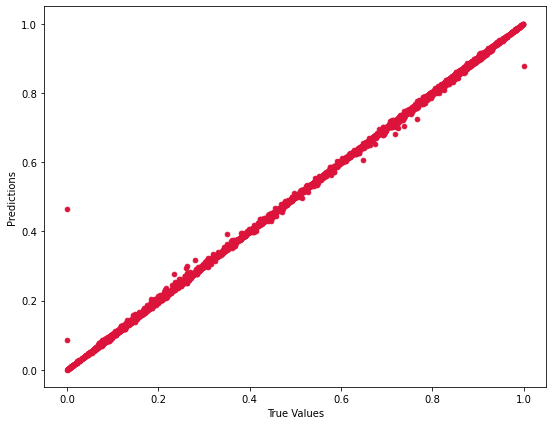

In [19]:
fig, (ax1) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax1 =sns.set_context("paper", font_scale=1.8, rc=paper_rc)

plt.scatter(y_test, y_pred_lrreg, color='crimson')
plt.xlabel("True Values")
plt.ylabel("Predictions")

#ax1_name = 'True_vs_Predicted_value_for_LinearReg' + '.tiff'
#plt.savefig(ax1_name, dpi=300);

plt.show()

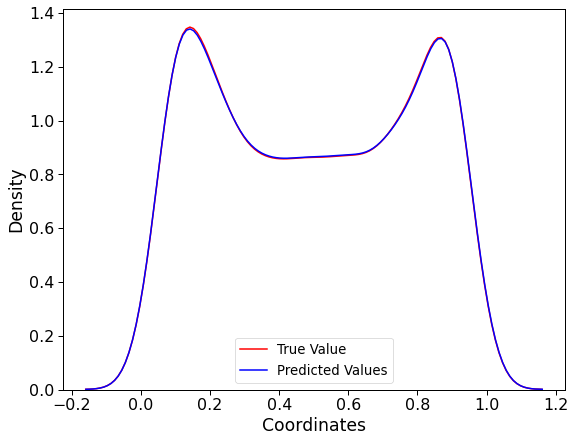

In [20]:
fig, (ax3) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax3 =sns.set_context("paper", font_scale=1.5, rc=paper_rc)

ax3 = sns.distplot(y_test, hist=False, color="r", label="True Value")
sns.distplot(y_pred_lrreg, hist=False, color="b", label="Predicted Values" , ax=ax3)
plt.xlabel('Coordinates')
plt.ylabel('Density')

#ax3_name = 'True_vs_Predicted_value_distplot__for_LinearReg' + '.jpeg'
#plt.savefig(ax3_name, dpi=300);


plt.show()
plt.close()

### KNeighbors Regression

In [53]:
KNrModel = KNeighborsRegressor()
KNrModel.fit(x_train, y_train)

KNeighborsRegressor()

In [54]:
KNrModel.score(x_train, y_train)

0.9924693847677508

In [55]:
KNrModel.score(x_test, y_test)

0.9892266696507473

In [56]:
y_pred_KNr = KNrModel.predict(x_test)

In [57]:
y_pred_KNr

array([[0.7945836, 0.9139766, 0.0580398],
       [0.2319868, 0.0866286, 0.340726 ],
       [0.8845378, 0.5708576, 0.8859572],
       ...,
       [0.4432622, 0.7663788, 0.148097 ],
       [0.7752636, 0.931239 , 0.7292968],
       [0.3899998, 0.8053482, 0.5068678]])

In [58]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_KNr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_KNr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNr)))

Mean Absolute Error: 0.02073595089355092
Mean Squared Error: 0.0009153375974128602
Root Mean Squared Error: 0.03025454672297802


In [59]:
# Calculate the absolute errors
errors = abs(y_pred_KNr - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: calc_coord_u    0.02
calc_coord_v    0.02
calc_coord_w    0.03
dtype: float64 degrees.
Accuracy: calc_coord_u    94.60
calc_coord_v    94.29
calc_coord_w     -inf
dtype: float64 %.


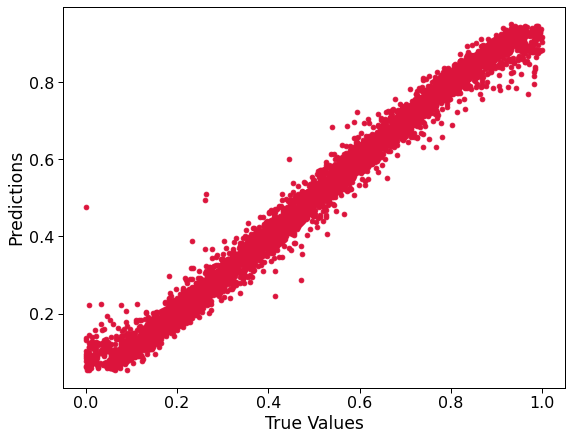

In [62]:
fig, (ax1) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax1 =sns.set_context("paper", font_scale=1.8, rc=paper_rc)

plt.scatter(y_test, y_pred_KNr, color='crimson')
plt.xlabel("True Values")
plt.ylabel("Predictions")

ax1_name = 'True_vs_Predicted_value_for_KNR' + '.tiff'
plt.savefig(ax1_name, dpi=300);

plt.show()

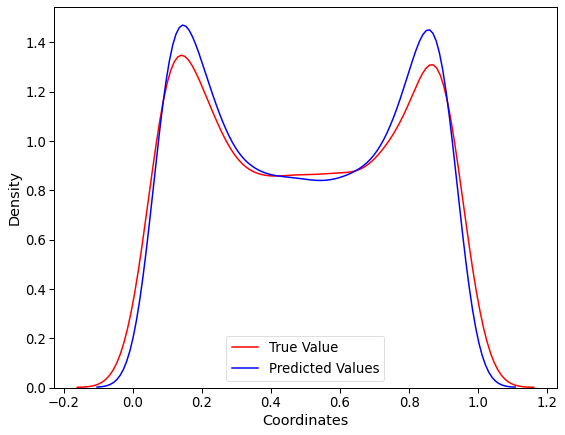

In [65]:
fig, (ax3) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax3 =sns.set_context("paper", font_scale=1.5, rc=paper_rc)

ax3 = sns.distplot(y_test, hist=False, color="r", label="True Value")
sns.distplot(y_pred_KNr, hist=False, color="b", label="Predicted Values" , ax=ax3)
plt.xlabel('Coordinates')
plt.ylabel('Density')

ax3_name = 'True_vs_Predicted_value_distplot__for_KNR' + '.jpeg'
plt.savefig(ax3_name, dpi=300);


plt.show()
plt.close()

### Decision Trees

In [21]:
dtrmodel = DecisionTreeRegressor()
dtrmodel.fit(x_train, y_train)

DecisionTreeRegressor()

In [22]:
dtrmodel.score(x_train, y_train)

1.0

In [23]:
dtrmodel.score(x_test, y_test)

0.9937918560665019

In [24]:
y_pred_dtr = dtrmodel.predict(x_test)

In [25]:
y_pred_dtr

array([[0.724753, 0.917427, 0.019586],
       [0.24714 , 0.069914, 0.312107],
       [0.858856, 0.501019, 0.983032],
       ...,
       [0.387421, 0.762336, 0.107258],
       [0.800236, 0.911411, 0.718796],
       [0.345247, 0.786644, 0.517441]])

In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr)))

Mean Absolute Error: 0.015066945299145311
Mean Squared Error: 0.0005277548022142973
Root Mean Squared Error: 0.02297291453460569


In [27]:
# Calculate the absolute errors
errors = abs(y_pred_dtr - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: calc_coord_u    0.01
calc_coord_v    0.02
calc_coord_w    0.01
dtype: float64 degrees.
Accuracy: calc_coord_u    94.49
calc_coord_v    94.00
calc_coord_w     -inf
dtype: float64 %.


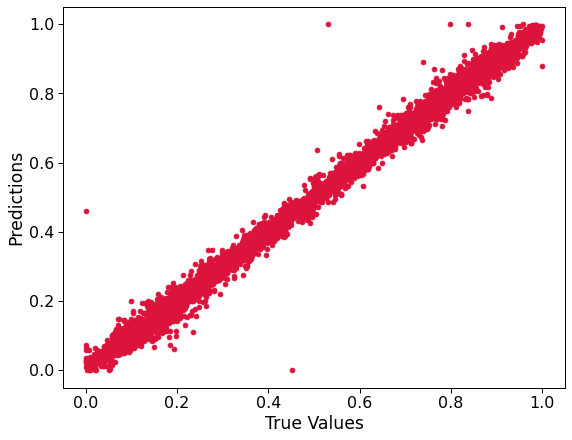

In [31]:
fig, (ax1) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax1 =sns.set_context("paper", font_scale=1.8, rc=paper_rc)

plt.scatter(y_test, y_pred_dtr, color='crimson')
plt.xlabel("True Values")
plt.ylabel("Predictions")

ax1_name = 'True_vs_Predicted_value_for_decision_tree' + '.tiff'
plt.savefig(ax1_name, dpi=300);

plt.show()

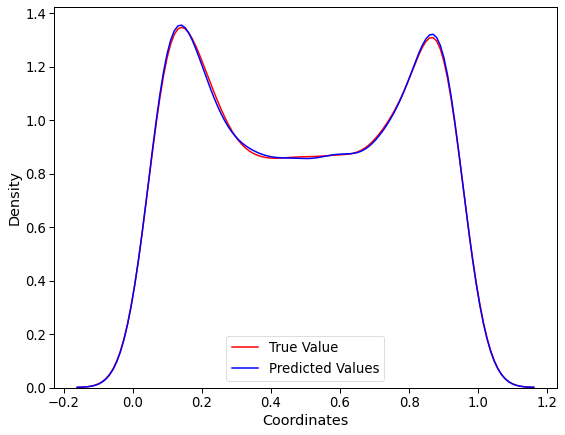

In [33]:
fig, (ax3) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax3 =sns.set_context("paper", font_scale=1.5, rc=paper_rc)

ax3 = sns.distplot(y_test, hist=False, color="r", label="True Value")
sns.distplot(y_pred_dtr, hist=False, color="b", label="Predicted Values" , ax=ax3)
plt.xlabel('Coordinates')
plt.ylabel('Density')

ax3_name = 'True_vs_Predicted_value_distplot__for_decision_tree' + '.jpeg'
plt.savefig(ax3_name, dpi=300);


plt.show()
plt.close()

### Extra Tree Regressor

In [37]:
etrmodel = ExtraTreeRegressor()
etrmodel.fit(x_train, y_train)

ExtraTreeRegressor()

In [38]:
etrmodel.score(x_train, y_train)

1.0

In [39]:
etrmodel.score(x_test, y_test)

0.9922233520857754

In [40]:
y_pred_etr = etrmodel.predict(x_test)

In [41]:
y_pred_etr

array([[0.783273, 0.927768, 0.043632],
       [0.263459, 0.068342, 0.291963],
       [0.858856, 0.501019, 0.983032],
       ...,
       [0.408297, 0.773178, 0.116576],
       [0.812338, 0.912983, 0.756771],
       [0.345247, 0.786644, 0.517441]])

In [42]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_etr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_etr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_etr)))

Mean Absolute Error: 0.015884991142191142
Mean Squared Error: 0.0006605628692329448
Root Mean Squared Error: 0.025701417650257054


In [43]:
# Calculate the absolute errors
errors = abs(y_pred_etr - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: calc_coord_u    0.02
calc_coord_v    0.02
calc_coord_w    0.02
dtype: float64 degrees.
Accuracy: calc_coord_u    94.00
calc_coord_v    94.47
calc_coord_w     -inf
dtype: float64 %.


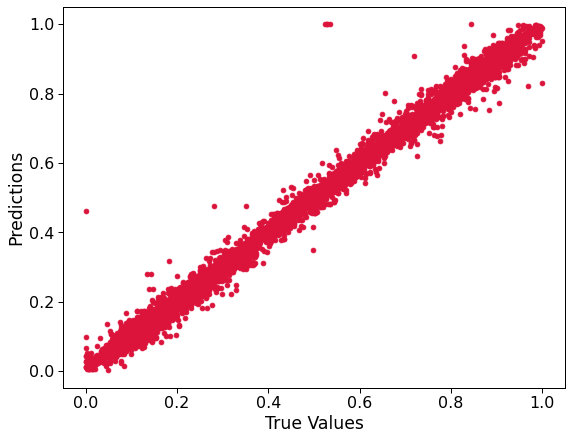

In [46]:
fig, (ax1) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax1 =sns.set_context("paper", font_scale=1.8, rc=paper_rc)

plt.scatter(y_test, y_pred_etr, color='crimson')
plt.xlabel("True Values")
plt.ylabel("Predictions")

ax1_name = 'True_vs_Predicted_value_for_extra_tree' + '.jpeg'
plt.savefig(ax1_name, dpi=300);

plt.show()

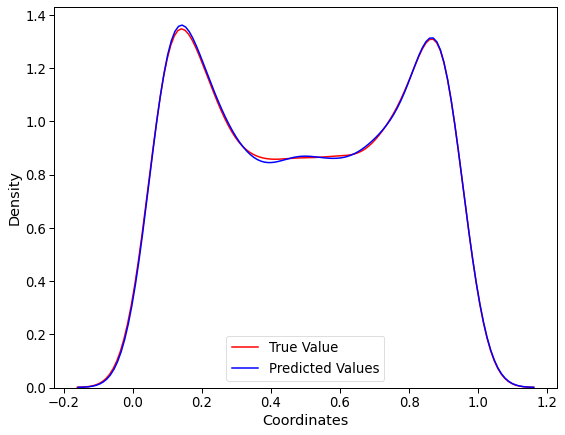

In [49]:
fig, (ax3) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax3 =sns.set_context("paper", font_scale=1.5, rc=paper_rc)

ax3 = sns.distplot(y_test, hist=False, color="r", label="True Value")
sns.distplot(y_pred_etr, hist=False, color="b", label="Predicted Values" , ax=ax3)
plt.xlabel('Coordinates')
plt.ylabel('Density')

ax3_name = 'True_vs_Predicted_value_distplot__for_extra_tree' + '.tiff'
plt.savefig(ax3_name, dpi=300);


plt.show()
plt.close()